## Figures for analysis of the myeloid dataset in SCLC samples only
This notebook reproduces Figures 6A-D, 7A-B, S7C-G

In [5]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib
import mygene
import matplotlib.pyplot as plt


In [6]:
import os
import pandas as pd
import re
import numpy as np
import glob
from pathlib import Path
from scipy import sparse
from copy import deepcopy
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso
from scipy import stats
from scipy.stats import zscore

<h3> Load data </h3>

In [7]:
out_dir = '../out.myeloid.SCLC_samples_only.060121/'

In [8]:
### Can be downloaded at https://data.humantumoratlas.org/
adata = sc.read(out_dir + 'adata.myeloid.SCLC_samples_only.010920.h5ad')


Only considering the two last: ['.010920', '.h5ad'].
Only considering the two last: ['.010920', '.h5ad'].


### Figure 6

In [9]:
import palettable

In [10]:
sc.set_figure_params(fontsize=16)

#### 6A

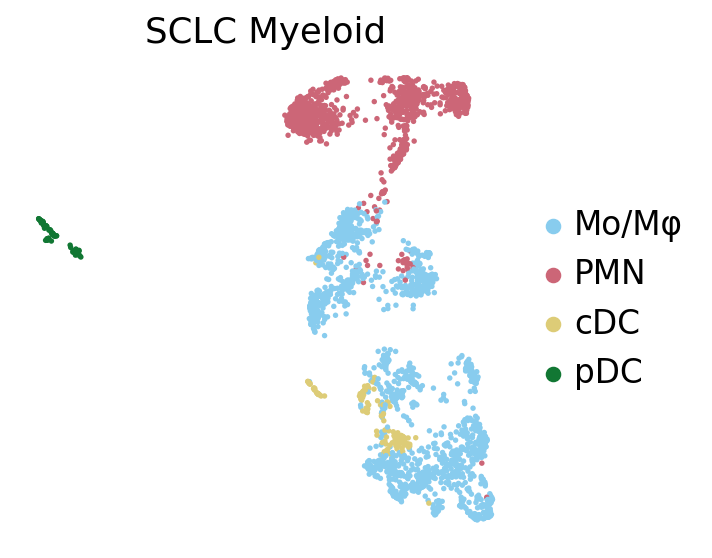

In [11]:
sc.pl.umap(
    adata, 
    color= 'cell_type',
    ncols=2, size=24,
    palette= palettable.cartocolors.qualitative.Safe_4.mpl_colors, #['#fbd1a2','#40c9a2','#3fa7d6','#93002d'],
    legend_fontoutline=2, title = 'SCLC Myeloid' ,
    frameon=False
)

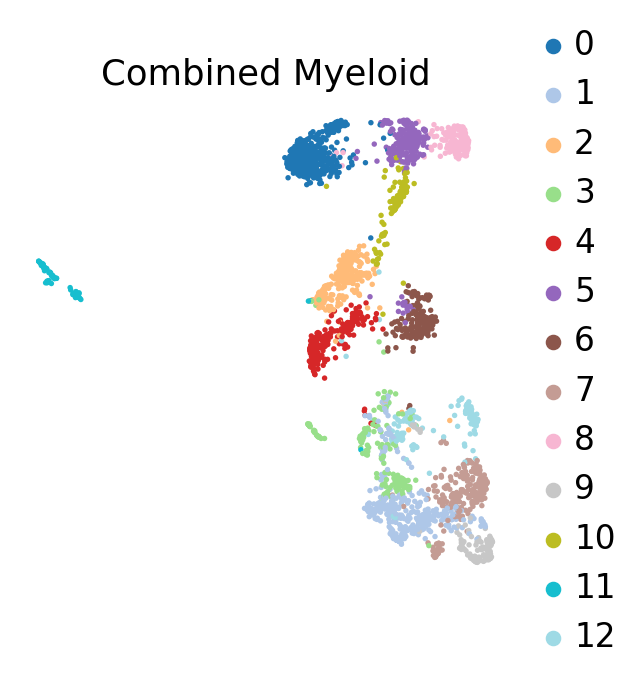

In [12]:
sc.pl.umap(
    adata, 
    color= 'clusters',
    ncols=2, size=24,
    palette= 'tab20', 
    legend_fontoutline=2, title = 'Combined Myeloid' ,
    frameon=False
)

#### 6B

In [13]:
from scipy.stats import zscore

In [14]:
gene_signature = 'IPF_associated'

In [15]:
adata.obs[gene_signature] = zscore(pd.DataFrame(zscore(adata.layers['imputed'][:,adata.var.loc[:,gene_signature]], axis = 0)).sum(axis=1).values)

In [16]:
ind_MoMf = adata.obs.cell_type_cluster.str.contains('Mo')
clust_ipf_df = adata.obs.loc[ind_MoMf ,['cell_type_cluster',gene_signature]]
clust_ipf_df.cell_type_cluster = clust_ipf_df.cell_type_cluster.astype(str)
clust_ipf_df = clust_ipf_df.loc[:,gene_signature].groupby(clust_ipf_df.cell_type_cluster).mean().sort_values()


In [17]:
ipf_genes = adata.var.index[adata.var.loc[:,gene_signature]]

In [18]:
mat = pd.DataFrame(adata.layers['imputed'][ind_MoMf,:][:,adata.var.index.isin(ipf_genes)], 
                   index = adata.obs.index[ind_MoMf], columns = ipf_genes)
mat2 = mat.groupby(adata.obs.loc[ind_MoMf,'cell_type_cluster'].astype(str)).mean()
mat2 = mat2.loc[clust_ipf_df.index]

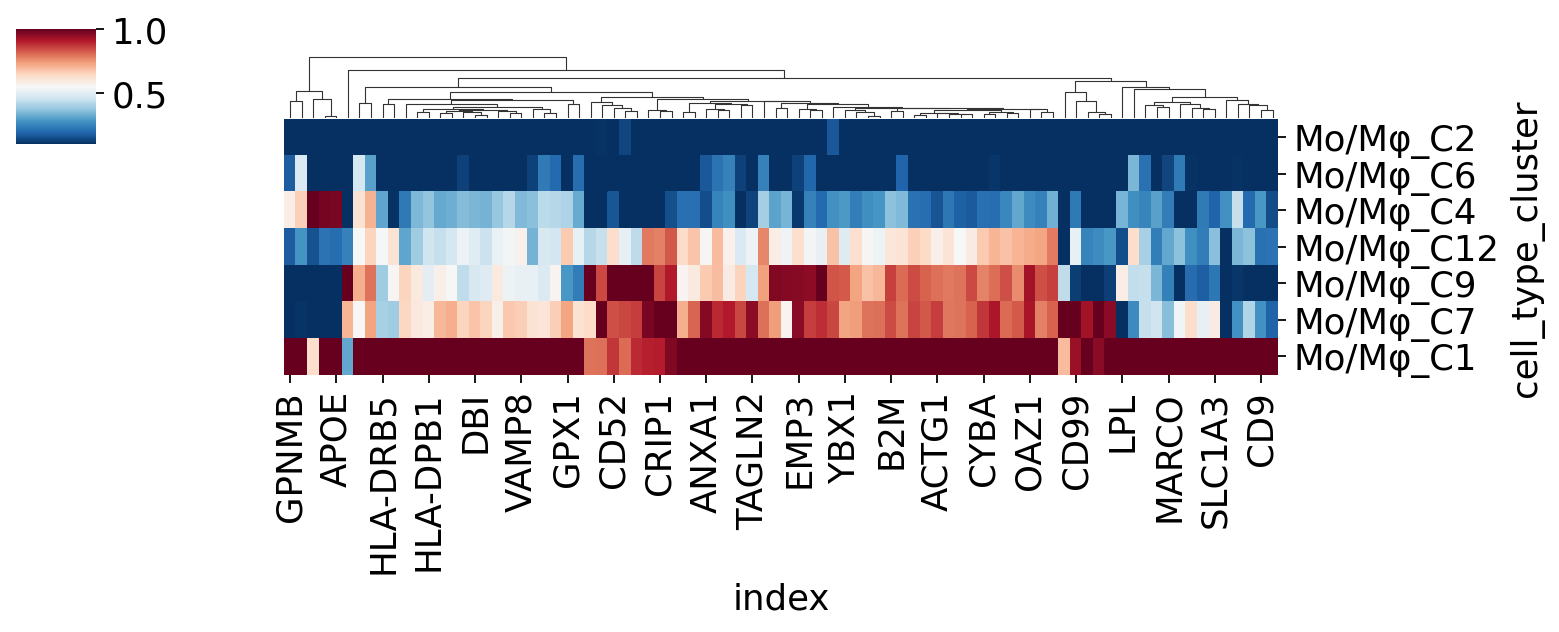

In [19]:
sns.clustermap(mat2,standard_scale = 1, figsize = (10,4), cmap = 'RdBu_r', 
               vmax = 1, vmin = 0.1,row_cluster = False)


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

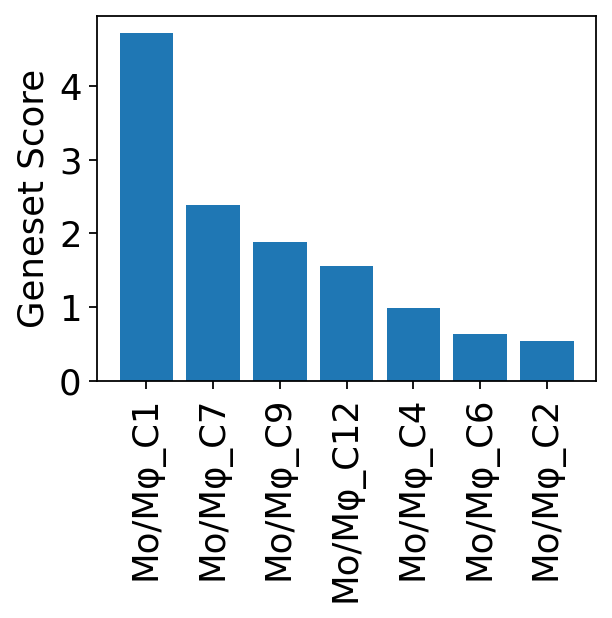

In [20]:
plt.rcParams['figure.figsize'] = [4, 3]
geneset_score = np.exp(clust_ipf_df.sort_values(ascending=False)) #Exponentiating to make all positive values
plt.bar(geneset_score.index, geneset_score)
plt.grid(False)
plt.ylabel('Geneset Score')
plt.xticks(rotation=90)


#### 6C

In [21]:
adata.obs['IPF_Monocytic'] = zscore(pd.DataFrame(zscore(adata.layers['imputed'][:,adata.var.IPF_Monocytic], 
                                                        axis = 0)).sum(axis=1).values)

In [22]:
adata.obs['IPF_Fibrotic'] = zscore(pd.DataFrame(zscore(adata.layers['imputed'][:,adata.var.IPF_Fibrotic], axis = 0)).sum(axis=1).values)

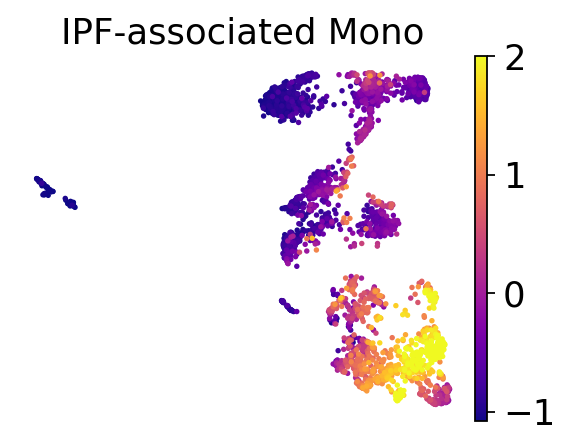

In [23]:
sc.pl.umap(
    adata, 
    cmap = 'plasma',
    color= 'IPF_Monocytic',
    vmax = 2,
    ncols=2, size=24,
    legend_fontoutline=2, title = 'IPF-associated Mono' ,
    frameon=False, 
)



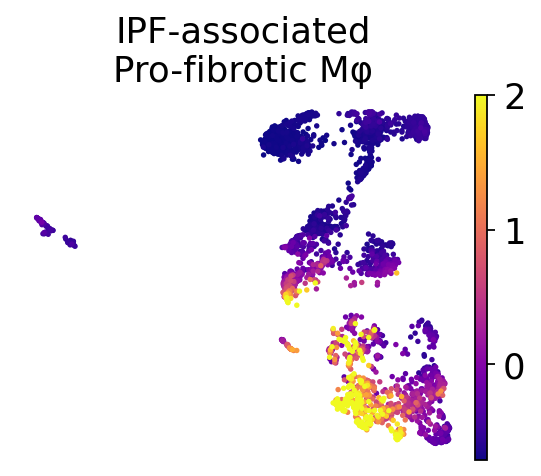

In [24]:
sc.pl.umap(
    adata, 
    cmap = 'plasma',
    color= 'IPF_Fibrotic',
    ncols=2, size=24,
    vmax = 2,
    legend_fontoutline=2, title = 'IPF-associated\nPro-fibrotic Mφ' ,
    frameon=False, 
)



#### 6D

In [25]:
gene_signature = 'IPF_Monocytic'

In [26]:
adata.obs[gene_signature] = zscore(pd.DataFrame(zscore(adata.layers['imputed'][:,adata.var.loc[:,gene_signature]], 
                                                       axis = 0)).sum(axis=1).values)

In [27]:
ind_MoMf = adata.obs.cell_type_cluster.str.contains('Mo')
clust_ipf_df = adata.obs.loc[ind_MoMf ,['cell_type_cluster',gene_signature]]
clust_ipf_df.cell_type_cluster = clust_ipf_df.cell_type_cluster.astype(str)
clust_ipf_df = clust_ipf_df.loc[:,gene_signature].groupby(clust_ipf_df.cell_type_cluster).mean().sort_values()


In [28]:
ipf_genes = adata.var.index[adata.var.loc[:,gene_signature]]

In [29]:
mat = pd.DataFrame(adata.layers['imputed'][ind_MoMf,:][:,adata.var.index.isin(ipf_genes)], 
                   index = adata.obs.index[ind_MoMf], columns = ipf_genes)
mat2 = mat.groupby(adata.obs.loc[ind_MoMf,'cell_type_cluster'].astype(str)).mean()
mat2 = mat2.loc[clust_ipf_df.index]

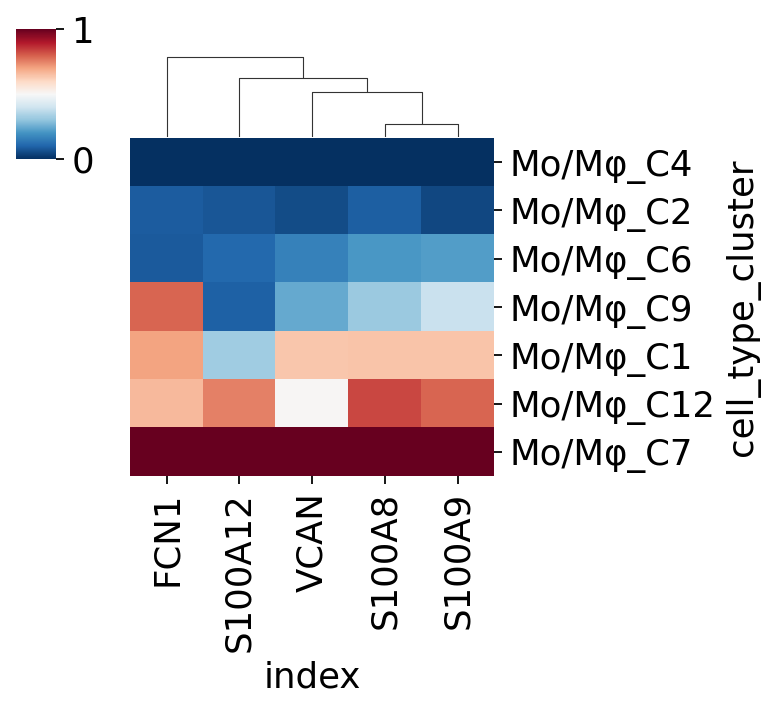

In [30]:
sns.clustermap(mat2,standard_scale = 1, figsize = (5,4.5), cmap = 'RdBu_r', 
               vmax = 1, vmin = 0,row_cluster = False)


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

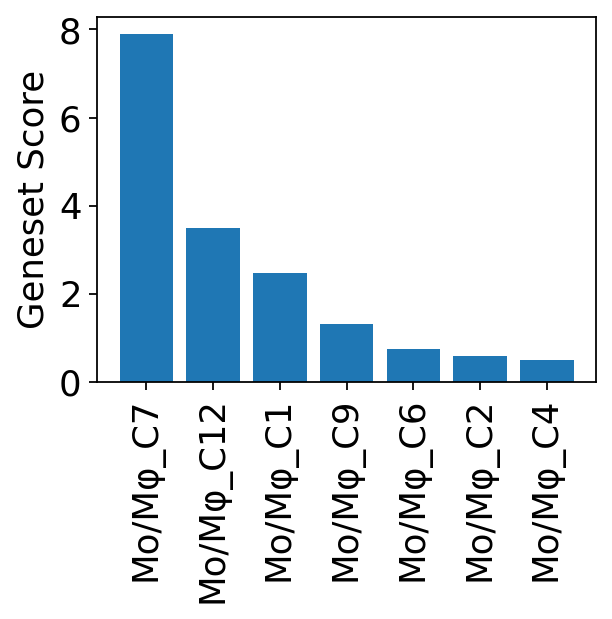

In [31]:
plt.rcParams['figure.figsize'] = [4, 3]
geneset_score = np.exp(clust_ipf_df.sort_values(ascending=False)) #Exponentiating to make all positive values
plt.bar(geneset_score.index, geneset_score)
plt.grid(False)
plt.ylabel('Geneset Score')
plt.xticks(rotation=90)


In [32]:
gene_signature = 'IPF_Fibrotic'

In [33]:
adata.obs[gene_signature] = zscore(pd.DataFrame(zscore(adata.layers['imputed'][:,adata.var.loc[:,gene_signature]], 
                                                       axis = 0)).sum(axis=1).values)

In [34]:
ind_MoMf = adata.obs.cell_type_cluster.str.contains('Mo')
clust_ipf_df = adata.obs.loc[ind_MoMf ,['cell_type_cluster',gene_signature]]
clust_ipf_df.cell_type_cluster = clust_ipf_df.cell_type_cluster.astype(str)
clust_ipf_df = clust_ipf_df.loc[:,gene_signature].groupby(clust_ipf_df.cell_type_cluster).mean().sort_values()


In [35]:
ipf_genes = adata.var.index[adata.var.loc[:,gene_signature]]

In [36]:
mat = pd.DataFrame(adata.layers['imputed'][ind_MoMf,:][:,adata.var.index.isin(ipf_genes)], 
                   index = adata.obs.index[ind_MoMf], columns = ipf_genes)
mat2 = mat.groupby(adata.obs.loc[ind_MoMf,'cell_type_cluster'].astype(str)).mean()
mat2 = mat2.loc[clust_ipf_df.index]

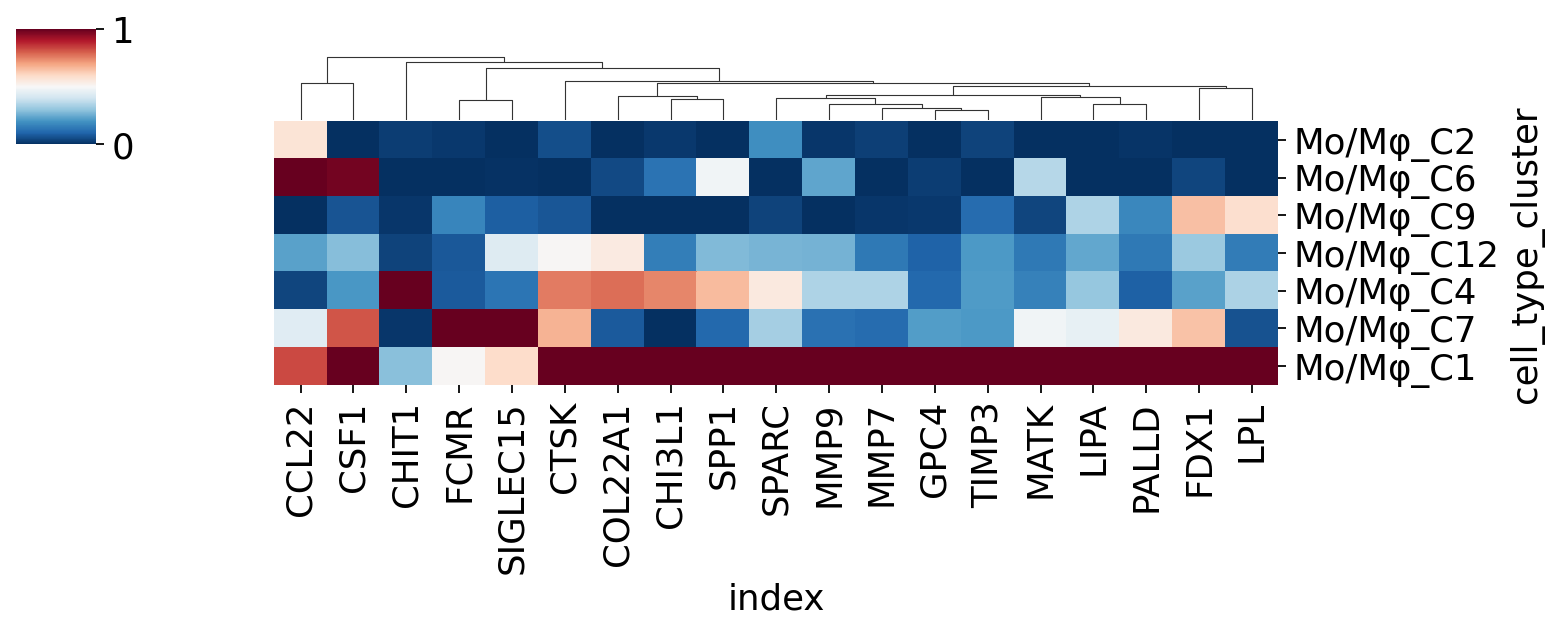

In [37]:
sns.clustermap(mat2,standard_scale = 1, figsize = (10,4), cmap = 'RdBu_r', 
               vmax = 1, vmin = 0,row_cluster = False)


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

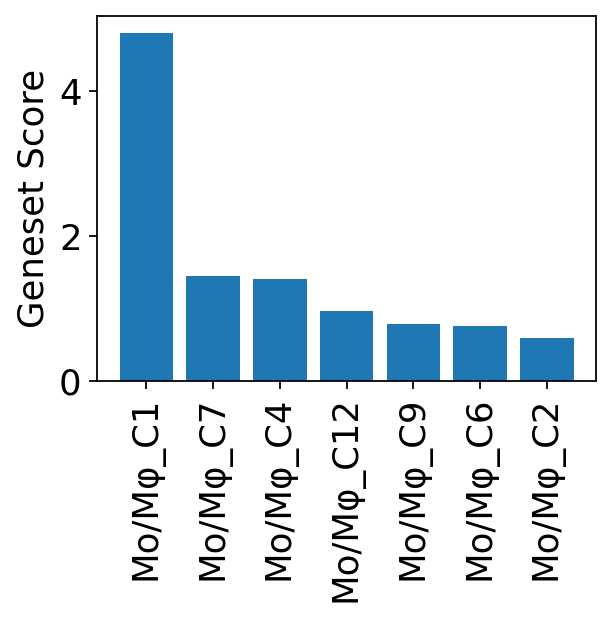

In [38]:
plt.rcParams['figure.figsize'] = [4, 3]
geneset_score = np.exp(clust_ipf_df.sort_values(ascending=False)) #Exponentiating to make all positive values
plt.bar(geneset_score.index, geneset_score)
plt.grid(False)
plt.ylabel('Geneset Score')
plt.xticks(rotation=90)


### Figure 7

#### 7A


In [101]:
# Load pre-computed cluster abundance, tumor phenotype score and clinical covariates per sample
MoMf_proportions_tumor_pheno = pd.read_table('../out.myeloid.SCLC_samples_only.060121/clusterComposition.myeloid.SCLC_samples_only.010920.txt', sep = '\t', index_col = 0)
sample_covariates = pd.read_csv('../out.myeloid.SCLC_samples_only.060121/sampleCovariates.myeloid.SCLC_samples_only.010920.txt', sep = '\t', index_col = 0)


In [102]:
MoMf_proportions_tumor_pheno.columns = MoMf_proportions_tumor_pheno.columns.str.replace('Mo/','Mono/')

In [103]:
# Perform partial correlation analysis while controlling tissue and treatment covariates
def partial_cor(X,y, cov):
    cvar = np.atleast_2d(cov)
    beta_x = np.linalg.lstsq(cvar, X, rcond=None)[0]
    beta_y = np.linalg.lstsq(cvar, y, rcond=None)[0]
    res_x = X - np.dot(cvar, beta_x)
    res_y = y - np.dot(cvar, beta_y)
    return spearmanr(res_x, res_y)

In [104]:
# Initialize dataframe storing correlation and pvalues
MoMf_proportions_tumor_pheno = MoMf_proportions_tumor_pheno.loc[sample_covariates.index].astype(np.float)
sclc_ct_corr_reg_df = pd.DataFrame(0, index = MoMf_proportions_tumor_pheno.columns, columns=MoMf_proportions_tumor_pheno.columns)
sclc_ct_pval_reg_df = pd.DataFrame('', index = MoMf_proportions_tumor_pheno.columns, columns=MoMf_proportions_tumor_pheno.columns)
sclc_ct_pvalue_reg_df = pd.DataFrame(0, index = MoMf_proportions_tumor_pheno.columns, columns=MoMf_proportions_tumor_pheno.columns)


/home/chanj3/anaconda3/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [105]:
from scipy.stats import spearmanr
import itertools
for j,pair in enumerate(itertools.combinations(MoMf_proportions_tumor_pheno.columns, r=2)):

    # X and y are the variables we want to correlate
    X = pd.DataFrame(MoMf_proportions_tumor_pheno.loc[:,pair[0]])
    y = MoMf_proportions_tumor_pheno[pair[1]].astype(np.float)
    
    # Generate dummy variables for the covariates, using treatment_Naive and tissue_lung as references
    cov = pd.get_dummies(sample_covariates[['treatment','tissue']])[['treatment_Platinum Doublet',
       'treatment_Platinum Doublet,Immunotherapy', 'treatment_TMZ',
       'tissue_LN', 'tissue_distant']]
    corr, pval = partial_cor(X,y,cov)
    
    # save results in dataframe
    sclc_ct_corr_reg_df.loc[pair[0],pair[0]] = 1; sclc_ct_pval_reg_df.loc[pair[0],pair[1]] = ''
    sclc_ct_corr_reg_df.loc[pair[0],pair[1]] = corr; sclc_ct_corr_reg_df.loc[pair[1],pair[0]] = corr
    sclc_ct_pval_reg_df.loc[pair[0],pair[1]] = '*' if pval<0.05 else ''
    if pval<0.01:
        sclc_ct_pval_reg_df.loc[pair[0],pair[1]] = '**'
    if pval<0.001:
        sclc_ct_pval_reg_df.loc[pair[0],pair[1]] = '***'
    sclc_ct_pval_reg_df.loc[pair[1],pair[0]] = sclc_ct_pval_reg_df.loc[pair[0],pair[1]]
    sclc_ct_pvalue_reg_df.loc[pair[0],pair[1]] = pval
    sclc_ct_pvalue_reg_df.loc[pair[1],pair[0]] = sclc_ct_pvalue_reg_df.loc[pair[0],pair[1]]


/home/chanj3/anaconda3/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


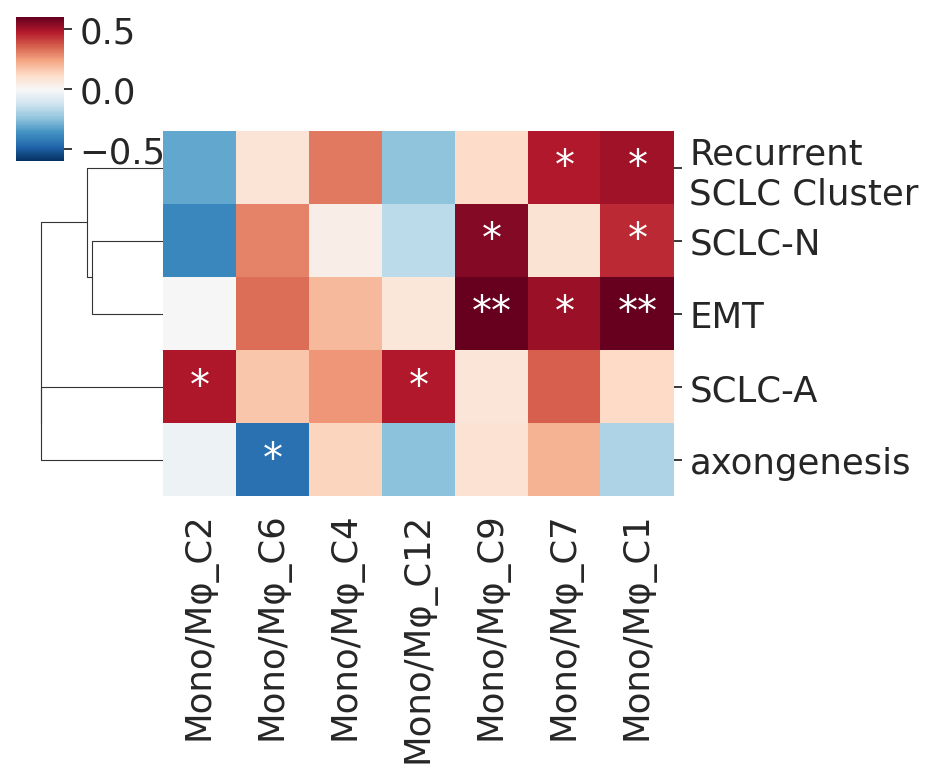

In [106]:
# plot results in heatmap
sclc_ct_corr_reg_df.index = sclc_ct_corr_reg_df.index.str.replace('Monocytes-Macrophages','Mono/Mφ')
sclc_ct_corr_reg_df.columns = sclc_ct_corr_reg_df.columns.str.replace('Monocytes-Macrophages','Mono/Mφ')
sclc_ct_pval_reg_df.index = sclc_ct_pval_reg_df.index.str.replace('Monocytes-Macrophages','Mono/Mφ')
sclc_ct_pval_reg_df.columns = sclc_ct_pval_reg_df.columns.str.replace('Monocytes-Macrophages','Mono/Mφ')
momf_order = ['Mono/Mφ_C1', 'Mono/Mφ_C7','Mono/Mφ_C9','Mono/Mφ_C12','Mono/Mφ_C4','Mono/Mφ_C6','Mono/Mφ_C2'][::-1]
g = sns.clustermap(sclc_ct_corr_reg_df.loc[momf_order, 
        ['Recurrent\nSCLC Cluster','SCLC-A','SCLC-N','EMT','axongenesis',]].fillna(0).T, 
        vmax = 0.6, vmin = -0.6, 
        annot = sclc_ct_pval_reg_df.loc[momf_order, 
        ['Recurrent\nSCLC Cluster','SCLC-A','SCLC-N','EMT','axongenesis']].T, fmt = '',
        cmap = 'RdBu_r', figsize = (6,5), annot_kws = {'fontsize': 18}, col_cluster=False)


#### 7B

In [52]:
from scipy.stats import spearmanr


In [55]:
# Load pre-computed cell type abundance, tumor phenotype score and clinical covariates per sample
sclc_proportions_ct_pheno = pd.read_csv('../out.immune.SCLC_samples_only.060121/celltypeComposition.immune.SCLC_samples_only.010920.txt', sep = '\t', index_col = 0)
sample_covariates = pd.read_csv('../out.immune.SCLC_samples_only.060121/sampleCovariates.immune.SCLC_samples_only.010920.txt', sep = '\t', index_col = 0)


In [56]:
# Partial correlation analysis controlling covariates

# initialize dataframe for storing pvalues and correlations
sclc_ct_corr_reg_df = pd.DataFrame(0, index = sclc_proportions_ct_pheno.columns, columns=sclc_proportions_ct_pheno.columns)
sclc_ct_pval_reg_df = pd.DataFrame('', index = sclc_proportions_ct_pheno.columns, columns=sclc_proportions_ct_pheno.columns)
sclc_ct_pvalue_reg_df = pd.DataFrame(0, index = sclc_proportions_ct_pheno.columns, columns=sclc_proportions_ct_pheno.columns)
 

In [57]:
for j,pair in enumerate(itertools.combinations(sclc_proportions_ct_pheno.columns, r=2)):
    
    # X and y are the variables we want to correlate
    X = pd.DataFrame(sclc_proportions_ct_pheno.loc[:,pair[0]])
    y = sclc_proportions_ct_pheno[pair[1]].astype(np.float)
    
    # Generate dummy variables for the covariates, using treatment_Naive and tissue_lung as references
    cov = pd.get_dummies(sample_covariates[['treatment','tissue']])[['treatment_Platinum Doublet',
       'treatment_Platinum Doublet,Immunotherapy', 'treatment_TMZ','tissue_LN', 'tissue_distant']]    
    corr, pval = partial_cor(X,y,cov)
    
    # save results in dataframe
    sclc_ct_corr_reg_df.loc[pair[0],pair[0]] = 1; sclc_ct_pval_reg_df.loc[pair[0],pair[1]] = ''
    sclc_ct_corr_reg_df.loc[pair[0],pair[1]] = corr; sclc_ct_corr_reg_df.loc[pair[1],pair[0]] = corr
    sclc_ct_pval_reg_df.loc[pair[0],pair[1]] = '*' if pval<0.05 else ''
    if pval<0.01:
        sclc_ct_pval_reg_df.loc[pair[0],pair[1]] = '**'
    if pval<0.001:
        sclc_ct_pval_reg_df.loc[pair[0],pair[1]] = '***'
    sclc_ct_pval_reg_df.loc[pair[1],pair[0]] = sclc_ct_pval_reg_df.loc[pair[0],pair[1]]
    sclc_ct_pvalue_reg_df.loc[pair[0],pair[1]] = pval
    sclc_ct_pvalue_reg_df.loc[pair[1],pair[0]] = sclc_ct_pvalue_reg_df.loc[pair[0],pair[1]]

# generate clustermap to reorder the columns and rows
g = sns.clustermap(sclc_ct_corr_reg_df.loc[['B cell', 'CD4+ Tconv', 'CD4+ Treg', 'CD8+ Teff','CD8+ Texh', 'CD8+ Tmem', 'Mast',
       'Mono/Mφ', 'NK', 'Tgd', 'Neutrophil', 'Plasma cell','cDC', 'pDC'],
            ['Recurrent\nSCLC Cluster','SCLC-A','SCLC-N','EMT','axongenesis']], 
               vmax = 0.5, vmin = -0.5, metric = 'sqeuclidean',figsize = (2,2), fmt = '',cmap = 'RdBu_r')
plt.close()


/home/chanj3/anaconda3/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/home/chanj3/anaconda3/envs/py3.7/lib/python3.7/site-packages/seaborn/matrix.py:1204: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(**tight_params)


In [58]:
row_order = ['Recurrent\nSCLC Cluster','SCLC-N','EMT','SCLC-A','axongenesis'
            ]

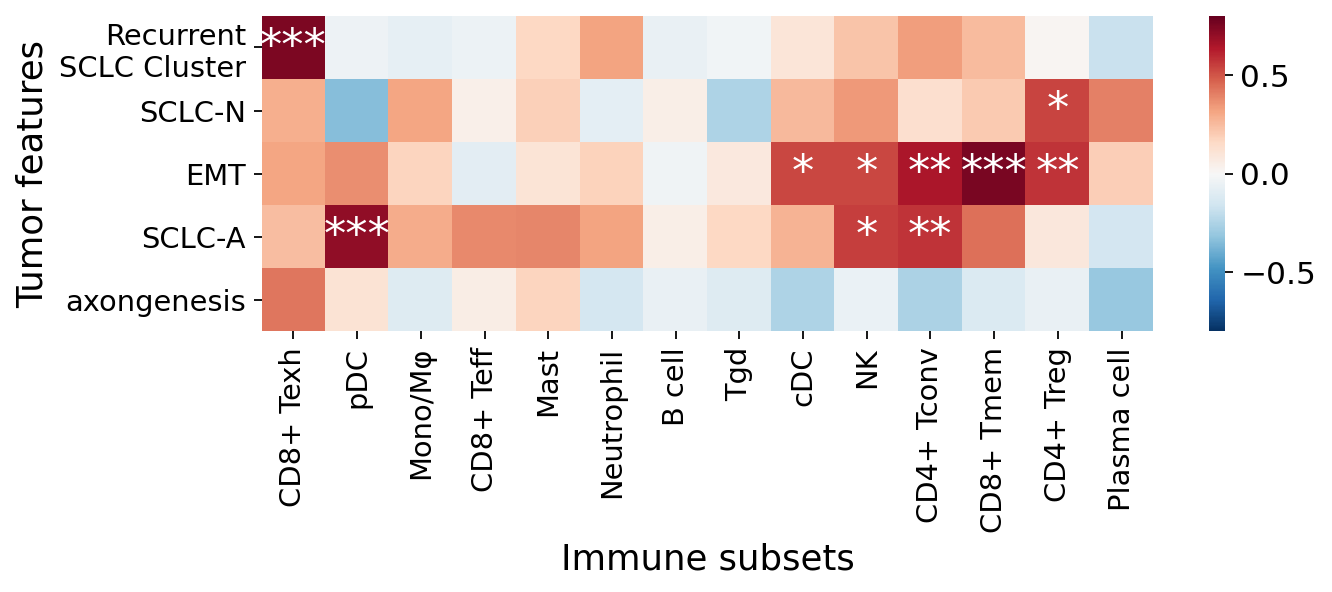

In [59]:
# plot result as heatmap with columns and rows reordered based on clustermap
plt.figure(figsize=(9,4))
ax = sns.heatmap(pd.DataFrame(sclc_ct_corr_reg_df.loc[['B cell', 'CD4+ Tconv', 'CD4+ Treg', 'CD8+ Teff','CD8+ Texh', 'CD8+ Tmem', 'Mast',
       'Mono/Mφ', 'NK', 'Tgd', 'Neutrophil', 'Plasma cell','cDC', 'pDC'],
            row_order].iloc[g.dendrogram_row.reordered_ind,:].T,),
        annot = pd.DataFrame(sclc_ct_pval_reg_df.loc[['B cell', 'CD4+ Tconv', 'CD4+ Treg', 'CD8+ Teff','CD8+ Texh', 'CD8+ Tmem', 'Mast',
       'Mono/Mφ', 'NK', 'Tgd', 'Neutrophil', 'Plasma cell','cDC', 'pDC'],
            row_order].iloc[g.dendrogram_row.reordered_ind,:].T,), 
            vmax = 0.8, vmin = -0.8, annot_kws = {'fontsize': 20}, fmt = '',cmap = 'RdBu_r',yticklabels = True, cbar_kws={"shrink": 1})
plt.ylabel('Tumor features')
plt.xlabel('Immune subsets')

cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=14)
plt.xticks(fontsize = 13, rotation = 90)
plt.yticks(fontsize = 13)

plt.tight_layout()

plt.savefig('/home/chanj3/data/HTA.myeloid.SCLC_samples_only.010920/out.myeloid.SCLC_samples_only.010920/figures/heatmap.correlations.immune_tumor.reordered.svg')


### Figure S7

#### S7C

In [60]:
ct_dict = {
    'Antigen\nPresentation': ['HLA-DRA','HLA-DRB1'],
    'Macrophage/\nMonocyte': ['CD14','FCGR3A','LYZ'],
    'Granulocyte': ['FUT4'],
    'Scavenger\nReceptors':['CD68','CD36','CD163','MARCO', 'MSR1',],
    'AP Signaling': ['JUNB','JUND','FOS'],
    'Fibrotic\nMacrophage': ['TGFB1','THBS1','CSF1R','TNFRSF1B'],
    'Monocytic\nMDSC-like': ['ITGAM','CD33','ADGRE1','VCAN','FCN1','S100A8','S100A9','S100A12','MNDA'],
    'Non-classical\nmonocyte': ['FCER1G','LST1','AIF1','IFITM3'],
    'cDC': ['CD1C','PPA1', 'LSP1', 'CSF2RA','HLA-DQB1', 'ID2'],
    'pDC': ['GZMB', 'JCHAIN', 'IRF7', 'ITM2C', 'LILRA4', 'PLD4','TCF4'],
    'Inflammatory\nMacrophage': ['IL1B','CXCL8','CCL3','CCL4','NFKBIA','SOD2'],
    'TAM-like': ['GPX1','C1QA','C1QB','C1QC','APOC1','APOE'],
    'Neutrophils': ['CSF3R', 'NAMPT', 'SLC25A37', 'RNF149', 'SMCHD1',
                 'FCGR3B', 'IL1R2','FAM65B','G0S2'],
}


In [61]:
adata.obs.loc[:,'Myeloid Subsets'] = adata.obs.cell_type_cluster

In [62]:
# By unsupervised clusters (shared phenotypic variations across celltypes)
matplotlib.rcdefaults()
sc.tl.dendrogram(adata, groupby='Myeloid Subsets', use_rep='X_pca', 
                 use_raw=False, cor_method='pearson', linkage_method='ward', key_added=None)



In [63]:
import itertools
gene_list = list(itertools.chain.from_iterable(list(ct_dict.values())))
ct_pos = [[i for i,j in enumerate(gene_list) if j in val] for val in ct_dict.values()]
ct_pos = [(i[0],i[0]) if len(i)==1 else (i[0],i[-1]) for i in ct_pos]


In [64]:
sc.set_figure_params(fontsize=12)

categories: Mo/Mφ_C1, Mo/Mφ_C2, Mo/Mφ_C4, etc.
var_group_labels: Antigen
Presentation, Macrophage/
Monocyte, Granulocyte, etc.


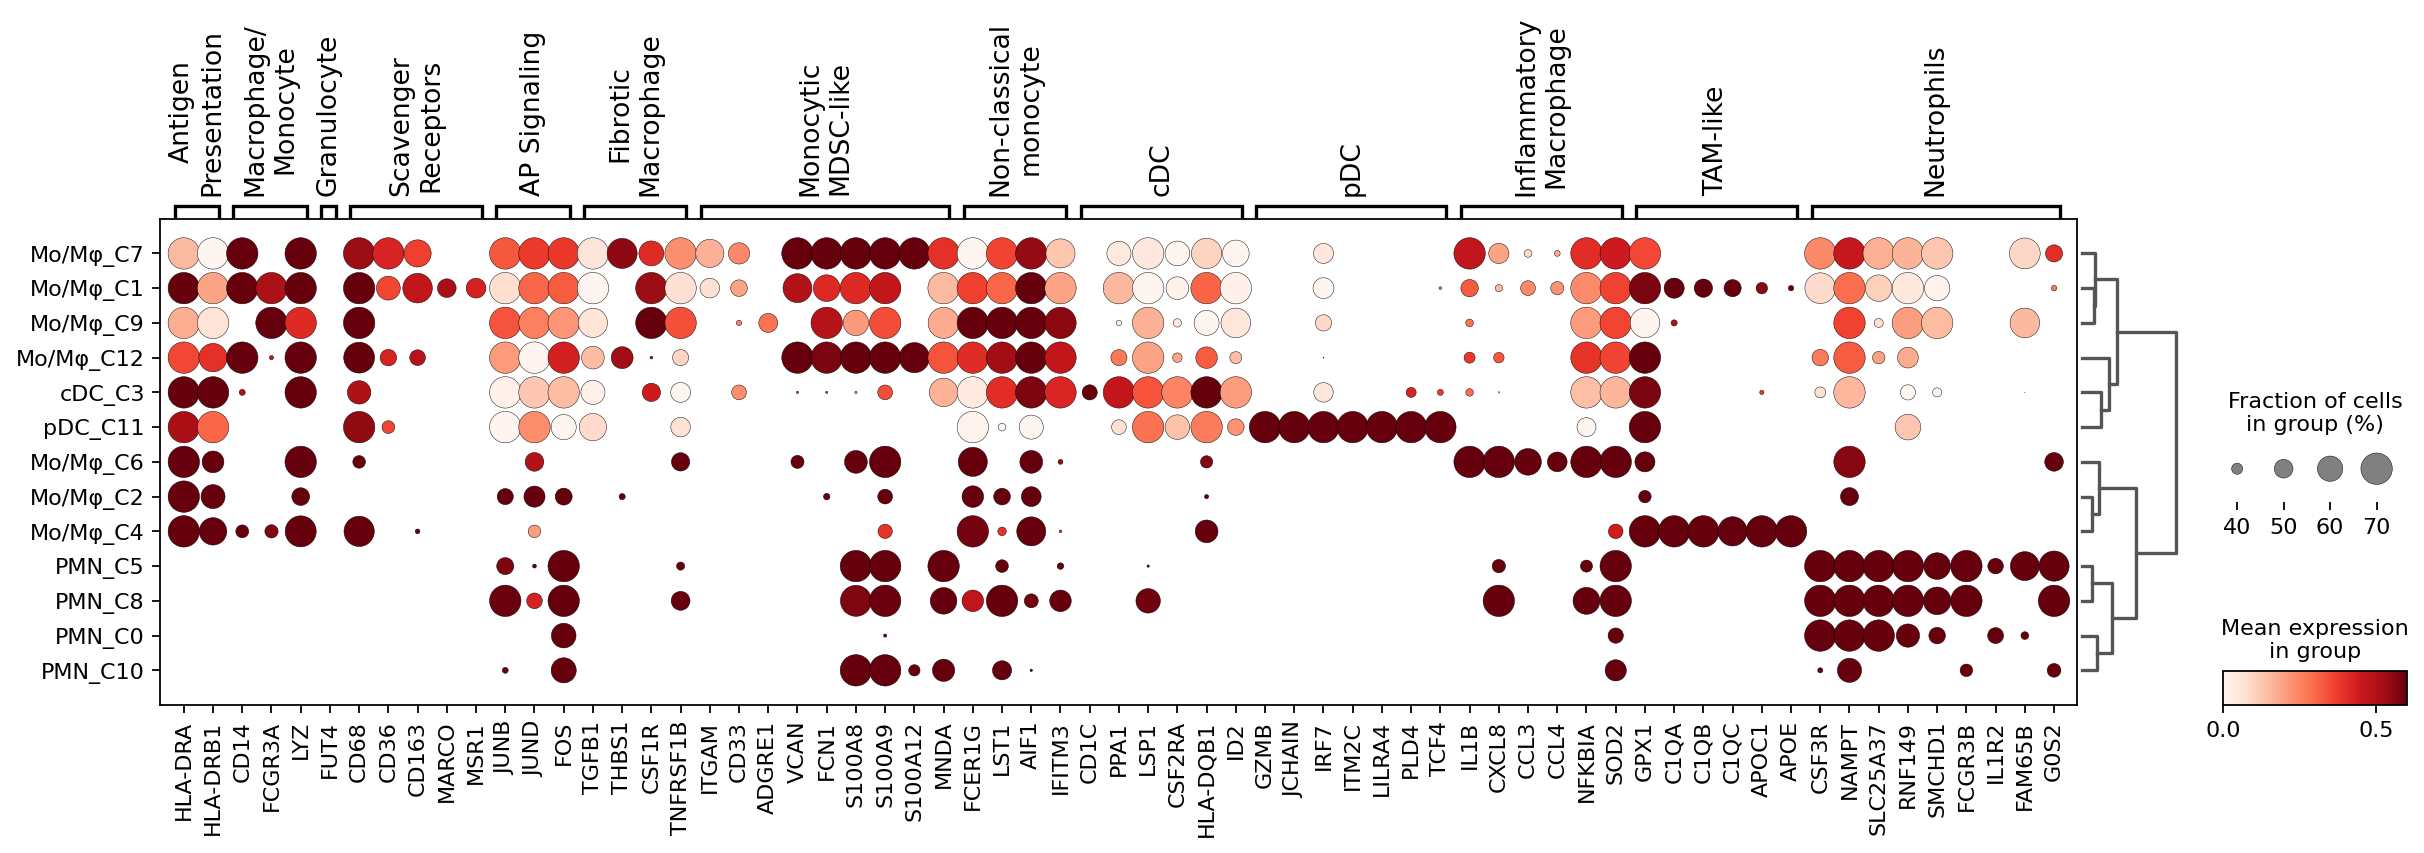

In [65]:
ax = sc.pl.dotplot(adata, gene_list, groupby='Myeloid Subsets', dendrogram=True,
                   var_group_positions=ct_pos,
                   mean_only_expressed = True,
                   dot_max = 0.7,
                   vmax = 0.6,
                   dot_min = 0.3,
                   standard_scale = 'var',
                   use_raw = False,
                   var_group_labels=list(ct_dict.keys()),
                   figsize=(18,4))


#### S7D

In [69]:
# Load mast results
comb_mast = pd.read_csv(out_dir + 'MAST/myeloid.SCLC_samples_only.c1_vs_moma_adjustFE_treatment_tissue.csv', index_col=0)


In [70]:
comb_mast[comb_mast['primerid'].isin(['CD14','FCGR3A','CD81'])]

,primerid,Pr(>Chisq),coef,ci.hi,ci.lo,fdr
63,FCGR3A,1.991385e-17,0.340483,0.481594,0.199371,6.100592e-15
221,CD81,5.029549e-11,0.397482,0.512006,0.282958,4.392321e-09
537,CD14,7.301771e-08,0.458105,0.618955,0.297255,2.624286e-06


In [99]:
# Load ambient RNA detection results
ambient = pd.read_csv(out_dir + '../out.combined.060121/ambient.all.50/idents/ambient.Mast.all.50.010920.txt', 
                      header = None, sep = '\t')

Text(56.95277777777778, 0.5, '-Log(P_adjusted)')

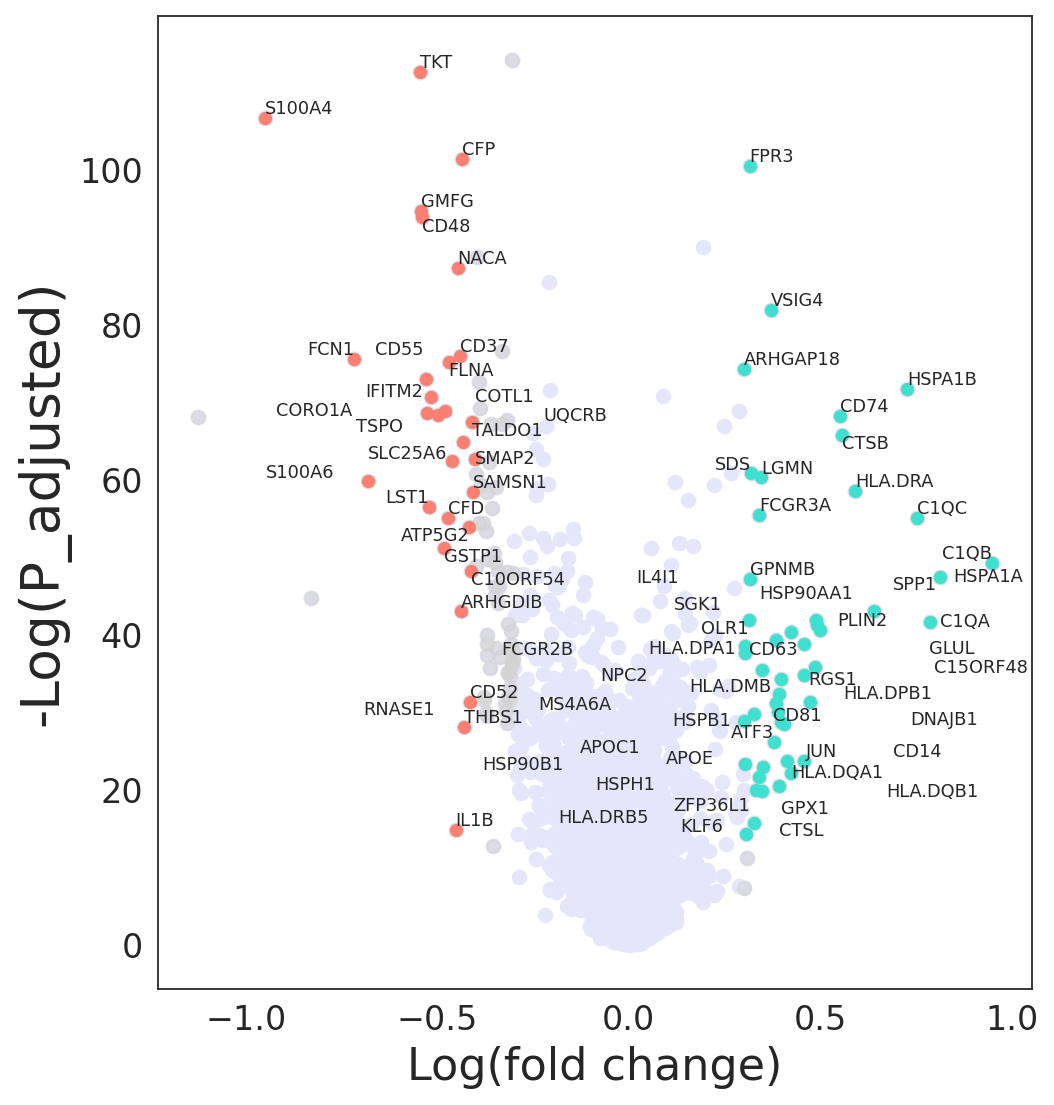

In [100]:
from adjustText import adjust_text
plt.rcParams['figure.figsize'] = [7, 8]
plt.scatter(comb_mast['coef'], -1*np.log2(comb_mast['Pr(>Chisq)']), c = 'lavender')
plt.scatter(comb_mast['coef'][(comb_mast['fdr']<0.05) & (abs(comb_mast['coef'])>0.3)], 
            -1*np.log2(comb_mast['Pr(>Chisq)'])[(comb_mast['fdr']<0.05) & (abs(comb_mast['coef'])>0.3)], c = 'lightgrey', alpha = 0.5)

# select genes to highlight (DEGs) and to exclude (ambient)
types3 = ambient[0]
types1 = list(set(comb_mast[comb_mast['fdr']<0.001]['primerid'].values).intersection(comb_mast[(comb_mast['coef'])>0.3]['primerid'].values).difference(set(types3)))
types2 = list(set(comb_mast[comb_mast['fdr']<0.001]['primerid'].values).intersection(comb_mast[(comb_mast['coef'])<-0.4]['primerid'].values).difference(set(types3)))

text = []
for i,t in enumerate(types1):
    x = comb_mast['coef'].iloc[np.where(comb_mast['primerid'] == t)[0]]
    y = -1*np.log2(comb_mast['Pr(>Chisq)']).iloc[np.where(comb_mast['primerid'] == t)[0]]
    plt.scatter(x, y,  color='turquoise', s = 24)
    text.append(plt.text(x.values, y.values, t, fontsize=8))
for i,t in enumerate(types2):
    x = comb_mast['coef'].iloc[np.where(comb_mast['primerid'] == t)[0]]
    y = -1*np.log2(comb_mast['Pr(>Chisq)']).iloc[np.where(comb_mast['primerid'] == t)[0]]
    plt.scatter(x, y, color='salmon', s = 24)
    text.append(plt.text(x.values, y.values, t, fontsize=8))
plt.xticks(size = 15); plt.yticks(size = 15)

adjust_text(text, force_points=(1,1), force_text=(1,1),expand_points=(1, 1), expand_text=(1, 1),)
plt.xlabel('Log(fold change)',fontsize = 20); plt.ylabel('-Log(P_adjusted)',fontsize = 24)



#### S7E

In [107]:
sns.set_style('ticks')

In [108]:
MoMf_proportions_tumor_pheno['PLCG2+ Tumor Subclone'] = '<0.75%'
MoMf_proportions_tumor_pheno.loc[['RU1195A','RU426B','RU1215','RU779D','RU1229A_Frozen','RU1181C','RU1124A_LN','PleuralEffusion','RU1065C'],'PLCG2+ Tumor Subclone'] = '>0.75%'


(0.0, 100.0)

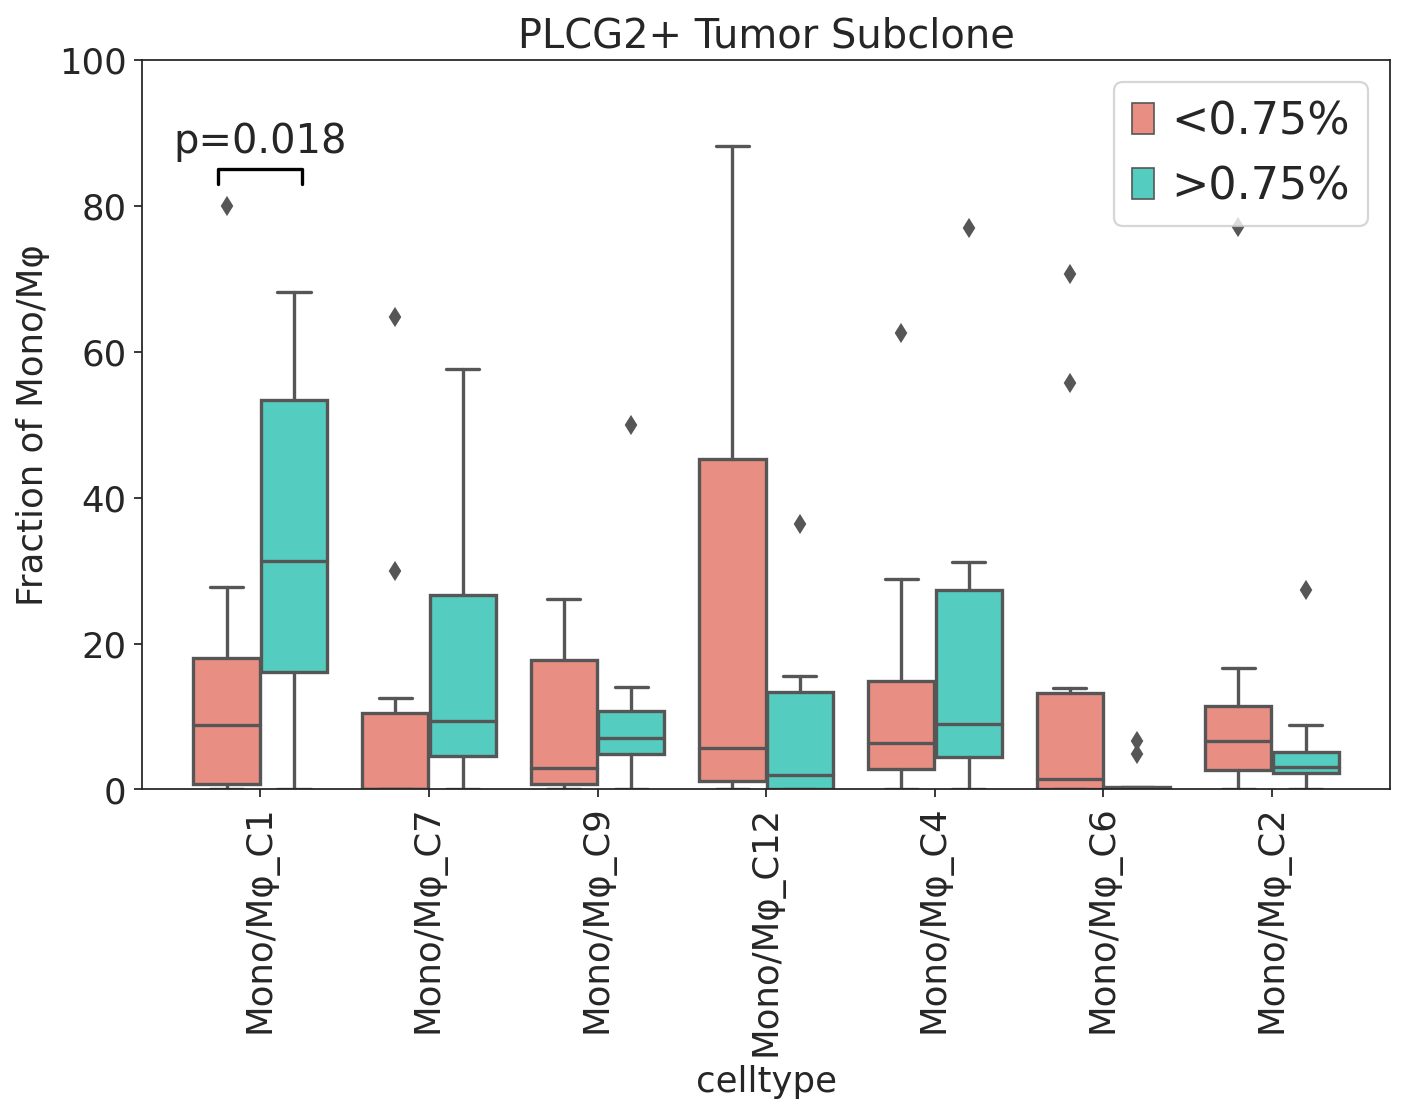

In [109]:
MoMf_proportions_tumor_pheno_long = pd.melt(MoMf_proportions_tumor_pheno[[
    'Mono/Mφ_C1', 'Mono/Mφ_C7',
       'Mono/Mφ_C9', 'Mono/Mφ_C12',
       'Mono/Mφ_C4', 'Mono/Mφ_C6',
       'Mono/Mφ_C2', 'PLCG2+ Tumor Subclone']], 'PLCG2+ Tumor Subclone', 
                                         var_name="celltype", value_name="proportion")
MoMf_proportions_tumor_pheno_long.celltype = MoMf_proportions_tumor_pheno_long.celltype.str.replace('Monocytes-Macrophages',
                                                                                                   'Mono/Mφ')
plt.rcParams['figure.figsize'] = [10,6]

ax = sns.boxplot(x = "celltype", y = "proportion", hue = 'PLCG2+ Tumor Subclone',
                 hue_order=['<0.75%', '>0.75%'], palette = ['salmon','turquoise'],
            data = MoMf_proportions_tumor_pheno_long)
plt.xticks(rotation=90, fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('Fraction of Mono/Mφ', fontsize = 16)
plt.text(0, 86, 'p=0.018', ha='center', va='bottom',fontsize=18)
plt.plot([-0.25,-0.25,0.25,0.25,], [83,85,85,83], lw=1.5, color = 'black')
plt.legend(fontsize = 20)
plt.title('PLCG2+ Tumor Subclone', fontsize = 18)
plt.ylim(0,100)



#### S7F

In [110]:
from scipy.stats import mannwhitneyu

In [113]:
# initialize dataframe to store the pvalues after dropping each sample
loso = pd.DataFrame(0,index = MoMf_proportions_tumor_pheno.index, columns = ['pval'])
for sample in set(MoMf_proportions_tumor_pheno.index):
    tmp = MoMf_proportions_tumor_pheno.drop(sample)
    loso.loc[sample] = mannwhitneyu(tmp[['Mono/Mφ_C1']][
        (tmp['PLCG2+ Tumor Subclone']=='<0.75%')],
        tmp[['Mono/Mφ_C1']][ 
        (tmp['PLCG2+ Tumor Subclone']=='>0.75%')]).pvalue
loso['sample'] = loso.index

Text(0.5, 0, 'P-value')

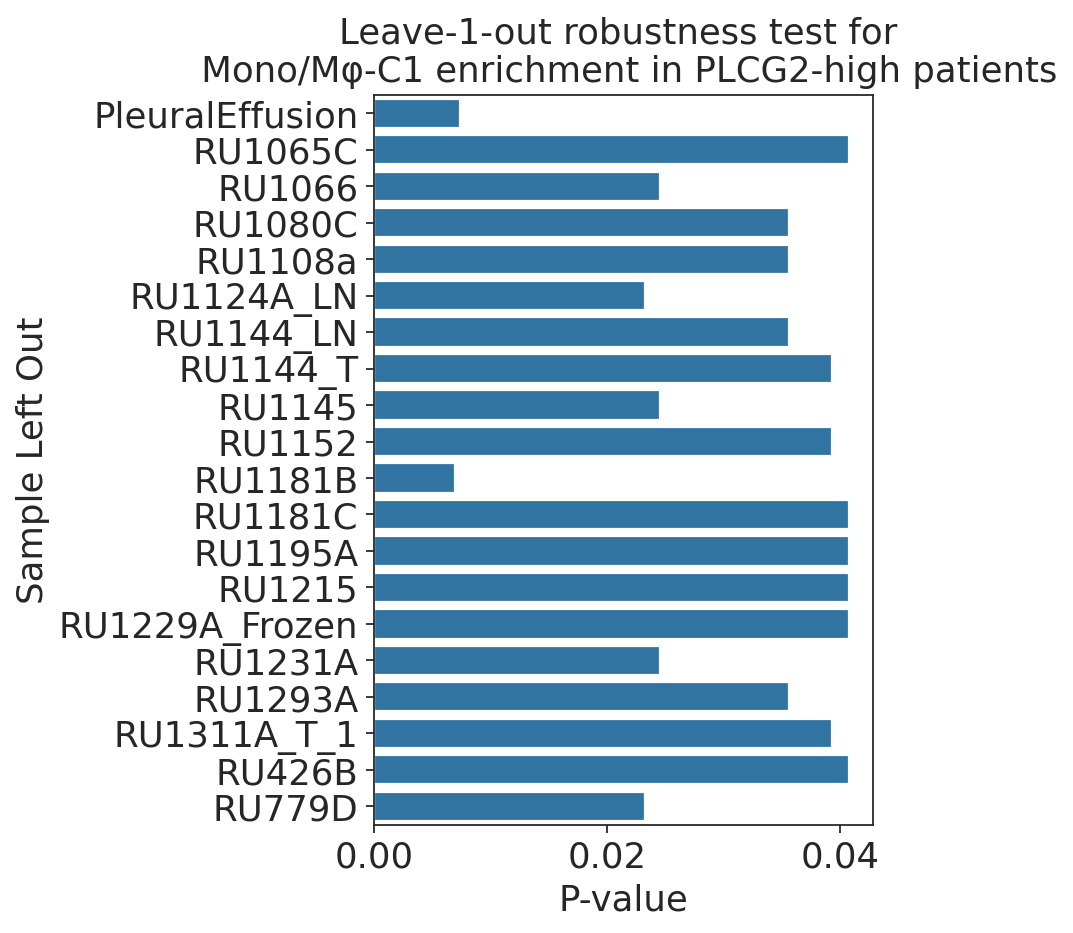

In [114]:
plt.rcParams['figure.figsize'] = [4, 6]
sns.barplot(y = 'sample', x = 'pval', data = loso, color = 'tab:blue')
plt.title('Leave-1-out robustness test for \n Mono/Mφ-C1 enrichment in PLCG2-high patients')
plt.ylabel('Sample Left Out')
plt.xlabel('P-value')


Text(0.5, 0, 'P-value')

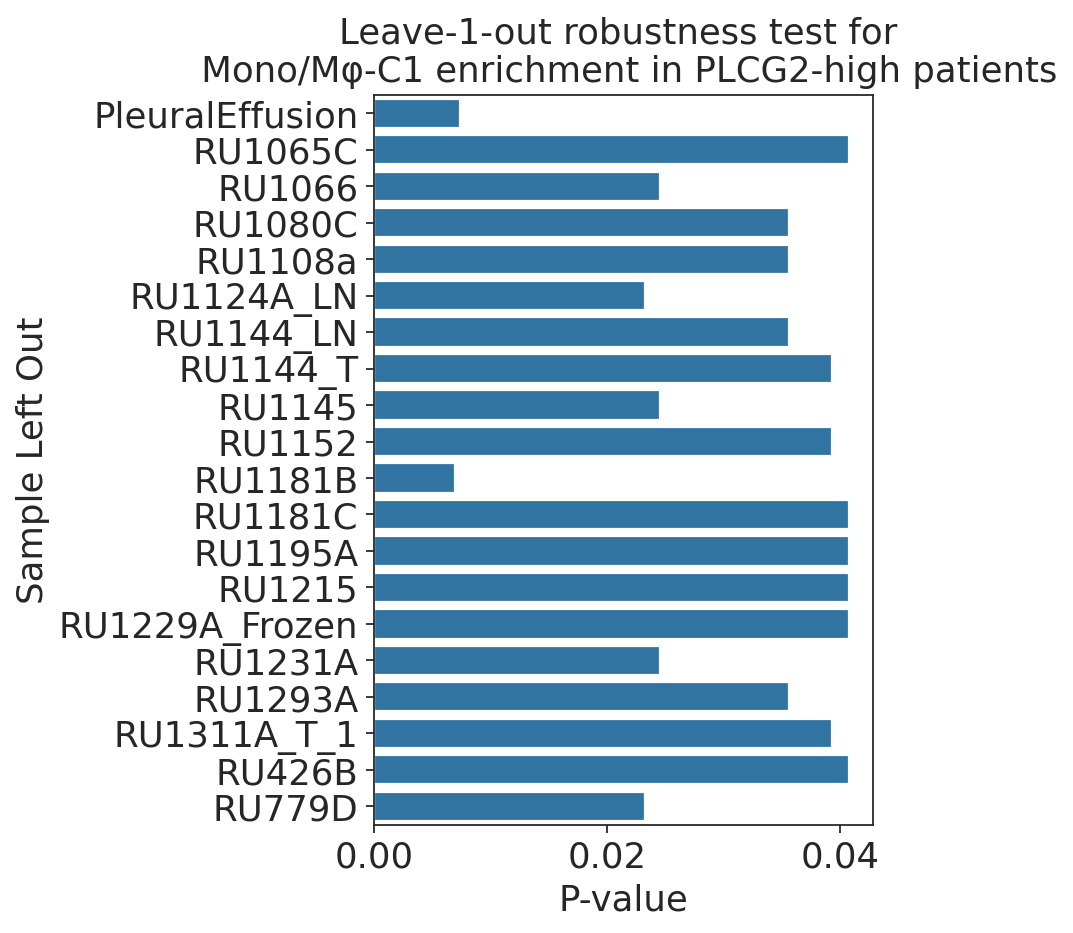

In [144]:
plt.rcParams['figure.figsize'] = [4, 6]
sns.barplot(y = 'sample', x = 'pval', data = loso, color = 'tab:blue')
plt.title('Leave-1-out robustness test for \n Mono/Mφ-C1 enrichment in PLCG2-high patients')
plt.ylabel('Sample Left Out')
plt.xlabel('P-value')


#### S7G

In [10]:
# Load George et al. bulk samples
data = pd.read_csv(out_dir + '../out.SCLC.060121/bulk_ref/George_etal.kallisto_0.43.1_tpm.bulk_RNA-seq.txt.zip',sep = '\t', index_col = 0).T


In [11]:
# Annotate with geneid
import mygene
mg = mygene.MyGeneInfo()
geneSyms = mg.querymany(list(data.columns) , scopes='ensembl.gene', fields='symbol', species='human')
gene_name = []
j=0
for i in geneSyms:
    try:
        gene_name.append(i['symbol'])
    except:
        gene_name.append('NA')
        j+=1
print(j)

data.columns = gene_name
data = data.loc[:,data.columns!='NA']
data = data.loc[:,(data.sum(0)>5)]

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-19000...done.
querying 19001-20000...done.
querying 20001-21000...done.
querying 21001-22000...done.
querying 22001-23000...done.
querying 23001-24000...done.
querying 24001-25000...done.
querying 25001-26000...done.
querying 26001-27000...done.
querying 27001-28000...done.
querying 28001-29000...done.
querying 29001-30000...done.
querying 30001-31000...done.
querying 31001-32000...done.
querying 32001-33000...done.
querying 33001-34000...done.
querying 34001-34908...done.
Finishe

In [12]:
# SCLC subtype annotation for bulk samples
bulka = pd.read_csv(out_dir + '../out.SCLC.060121/bulk_ref/George_etal.limma.DEG.SCLC-A.090219.csv', sep = '\t', index_col = 0)
bulkn = pd.read_csv(out_dir + '../out.SCLC.060121/bulk_ref/George_etal.limma.DEG.SCLC-N.090219.csv', sep = '\t', index_col = 0)
bulkp = pd.read_csv(out_dir + '../out.SCLC.060121/bulk_ref/George_etal.limma.DEG.SCLC-P.090219.csv', sep = '\t', index_col = 0)
bulky = pd.read_csv(out_dir + '../out.SCLC.060121/bulk_ref/George_etal.limma.DEG.SCLC-Y.090219.csv', sep = '\t', index_col = 0)
bulka = bulka[(bulka['logFC']>10) & (bulka['AveExpr']>50) & (bulka['adj.P.Val']<0.01)].index
bulkn = bulkn[(bulkn['logFC']>10) & (bulkn['AveExpr']>50) & (bulkn['adj.P.Val']<0.01)].index
bulkp = bulkp[(bulkp['logFC']>10) & (bulkp['AveExpr']>50) & (bulkp['adj.P.Val']<0.01)].index
bulky = bulky[(bulky['logFC']>10) & (bulky['AveExpr']>50) & (bulky['adj.P.Val']<0.01)].index
scorea = zscore(data[bulka.intersection(data.columns)]).sum(1)
scoren = zscore(data[bulkn.intersection(data.columns)]).sum(1)
scorep = zscore(data[bulkp.intersection(data.columns)]).sum(1)
scorey = zscore(data[bulky.intersection(data.columns)]).sum(1)
score = pd.DataFrame([scorea, scoren, scorep, scorey]).T
score.index = data.index
score.columns = ['A','N','P','Y']
bulk_subtype = score.idxmax(1)

In [81]:
# Restrict to subtype A and N only
data = data[bulk_subtype.isin(['A','N'])]

In [88]:
# Load genesets
gs_emt = ['COL3A1', 'COL5A2', 'COL5A1', 'FBN1', 'COL1A1', 'FN1', 'COL6A3',
       'SERPINE1', 'COL1A2', 'COL4A1', 'COL4A2', 'VCAN', 'IGFBP3',
       'TGFBI', 'SPARC', 'LUM', 'LAMC1', 'LOX', 'LAMC2', 'CTGF', 'TAGLN',
       'COL7A1', 'LOXL2', 'COL6A2', 'ITGAV', 'THBS2', 'COL16A1', 'NNMT',
       'TPM1', 'CDH2', 'MMP2', 'COL11A1', 'THBS1', 'FAP', 'BGN',
       'SERPINH1', 'FSTL1', 'POSTN', 'THY1', 'SPP1', 'TNC', 'TFPI2',
       'NID2', 'ITGB5', 'MMP3', 'VIM', 'LOXL1', 'FBLN5', 'COL12A1', 'ELN',
       'CDH11', 'COMP', 'SPOCK1', 'BMP1', 'IL32', 'LAMA3', 'TIMP1',
       'QSOX1', 'TIMP3', 'VCAM1', 'CYR61', 'EDIL3', 'CALD1', 'MAGEE1',
       'FBLN1', 'SGCB', 'ECM1', 'LAMA2', 'FSTL3', 'TPM2', 'INHBA', 'DAB2',
       'EMP3', 'BASP1', 'ITGA5', 'MGP', 'VEGFA', 'CXCL1', 'WNT5A', 'SDC1',
       'PLOD2', 'PCOLCE', 'GREM1', 'ITGB1', 'COL5A3', 'RHOB', 'HTRA1',
       'FGF2', 'SNTB1', 'GADD45A', 'MEST', 'LRRC15', 'TNFRSF11B', 'CD59',
       'ACTA2', 'EFEMP2', 'MATN2', 'PCOLCE2', 'SERPINE2', 'GPC1',
       'ABI3BP', 'FUCA1', 'SLIT3', 'LAMA1', 'PMEPA1', 'COL8A2', 'FBN2',
       'IGFBP2', 'PFN2', 'SDC4', 'CD44', 'GADD45B', 'IL8', 'GLIPR1',
       'ANPEP', 'LEPRE1', 'VEGFC', 'MMP14', 'SGCD', 'PLOD1', 'MATN3',
       'MYL9', 'SLC6A8', 'CALU', 'PRRX1', 'TNFRSF12A', 'FMOD', 'ID2',
       'GEM', 'PLAUR', 'MYLK', 'TGFB1', 'SFRP1', 'PLOD3', 'IL6', 'APLP1',
       'FBLN2', 'MSX1', 'PTX3', 'FZD8', 'JUN', 'FERMT2', 'DKK1', 'SNAI2',
       'DST', 'TPM4', 'DCN', 'GJA1', 'PMP22', 'IGFBP4', 'COPA', 'LRP1',
       'ITGA2', 'FLNA', 'MFAP5', 'PTHLH', 'TGFBR3', 'SFRP4', 'LGALS1',
       'RGS4', 'CDH6', 'SAT1', 'NT5E', 'DPYSL3', 'PPIB', 'TGM2', 'SGCG',
       'ITGB3', 'PDLIM4', 'CTHRC1', 'ECM2', 'CRLF1', 'AREG', 'IL15',
       'MCM7', 'GAS1', 'PRSS2', 'CADM1', 'OXTR', 'SCG2', 'CXCL6', 'MMP1',
       'TNFAIP3', 'CAPG', 'CAP2', 'MXRA5', 'FOXC2', 'NTM', 'ENO2', 'FAS',
       'BDNF', 'ADAM12', 'PVR', 'CXCL12', 'PDGFRB', 'SLIT2', 'NOTCH2',
       'GLT25D1', 'GPX7', 'WIPF1'] # from HALLMARK EMT geneset from MsigDB
gs_texh = ['TIGIT', 'PDCD1', 'CD274', 'CTLA4', 'LAG3', 'HAVCR2', 'CD244',
       'CD160'] # from Azizi et al. 2018


In [82]:
gs_profib = pd.read_csv(out_dir + 'MAST/myeloid.SCLC_samples_only.c1_vs_moma_adjustFE_treatment_tissue.csv', index_col = 0)


In [83]:
def get_scores(data, geneset1, geneset2):
    genes1 = set(geneset1).intersection(data.columns)
    genes2 = set(geneset2).intersection(data.columns)
    print('Number of genes in gene set1: {}'.format(len(genes1)))
    print('Number of genes in gene set2: {}'.format(len(genes2)))
    temp1 = data.loc[:,genes1]
    temp2 = data.loc[:,genes2]
    score1 = zscore(np.log2(temp1+1)).sum(1)
    score2 = zscore(np.log2(temp2+1)).sum(1)
    print(genes1.intersection(genes2))
    return score1, score2

In [84]:
from scipy.stats import spearmanr


In [89]:
# Correlating profibrotic myeloid signature with EMT signatures
geneset1 = list(set(gs_emt).difference(set(['SPP1', 'FN1'])))
geneset2 = gs_profib['primerid'][(gs_profib['fdr']<0.05) & (gs_profib['coef']>0.5)].values
score1, score2 = get_scores(data, geneset1, geneset2)
cor1 = spearmanr(score1, score2).correlation
pval1 = spearmanr(score1, score2).pvalue

Number of genes in gene set1: 192
Number of genes in gene set2: 8
set()


In [90]:
# Correlating profibrotic myeloid signature with PLCG2 expression
geneset = gs_profib['primerid'][(gs_profib['fdr']<0.05) & (gs_profib['coef']>0.5)].values
score1, score2 = get_scores(data, ['PLCG2'], geneset)
cor2 = spearmanr(score1, score2).correlation
pval2 = spearmanr(score1, score2).pvalue


Number of genes in gene set1: 1
Number of genes in gene set2: 8
set()


In [91]:
# Correlating profibrotic myeloid signature with T cell exhaustion signatures
geneset1 = gs_profib['primerid'][(gs_profib['fdr']<0.05) & (gs_profib['coef']>0.5)].values
geneset2 = gs_texh
score1, score2 = get_scores(data, geneset1, geneset2)
cor3 = spearmanr(score1, score2).correlation
pval3 = spearmanr(score1, score2).pvalue

Number of genes in gene set1: 8
Number of genes in gene set2: 8
set()


In [92]:
cors = pd.Series([cor1, cor2, cor3], index  = ['EMT signature', 'PLCG2 expression','T-cell exhaustion'])
pvals = pd.Series([pval1,pval2, pval3], index  = ['EMT signature', 'PLCG2 expression','T-cell exhaustion'])

In [93]:
pvals

EMT signature        8.581492e-06
PLCG2 expression     1.511954e-06
T-cell exhaustion    9.656964e-13
dtype: float64

Text(0.5, 0, 'Correlation with Profibrotic Myeloid Signature')

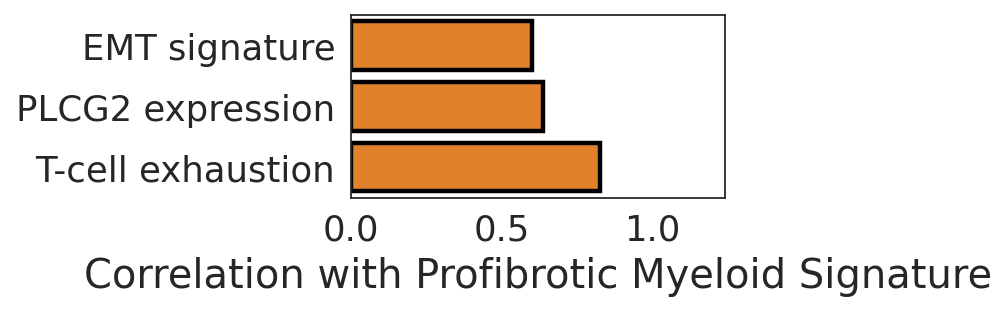

In [94]:
sc.set_figure_params(fontsize=16)
sns.set_style(style='white')
plt.rcParams['figure.figsize'] = [3,1.5]
ax = sns.barplot(y = cors.index, x = cors,orient='horizontal', color = 'tab:orange', edgecolor = 'black')
plt.setp(ax.patches, linewidth=2)
plt.xlim(0,1.24)
plt.xlabel('Correlation with Profibrotic Myeloid Signature', fontsize = 18)


In [95]:
# Correlating PLCG2 expression with T cell exhaustion signatures
geneset = gs_texh
score1, score2 = get_scores(data, ['PLCG2'], geneset)
cor4 = spearmanr(score1, score2).correlation
pval4 = spearmanr(score1, score2).pvalue

Number of genes in gene set1: 1
Number of genes in gene set2: 8
set()


In [96]:
pval4

1.0072708544500107e-05

Text(0.5, 0, 'Correlation with PLCG2 Expression')

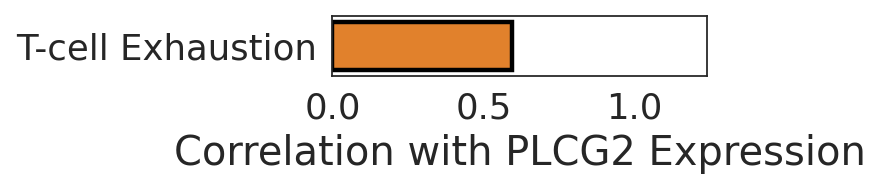

In [97]:
sns.set_style(style='white')
plt.rcParams['figure.figsize'] = [3,0.49]
ax = sns.barplot(y = ['T-cell Exhaustion'], x = [cor4],orient='horizontal', color = 'tab:orange', edgecolor = 'black')
plt.setp(ax.patches, linewidth=2)
plt.xlim(0,1.24)
plt.xlabel('Correlation with PLCG2 Expression', fontsize = 18)
